In [43]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from geopy.distance import geodesic
import os

def calculate_distance_from_point_to_station(row):
    station_coord = (row['LATITUDE:'], row['LONGITUDE:'])
    given_point_coord = (-15.789343, -47.925756)
    return geodesic(station_coord, given_point_coord).kilometers

df_all_stations = pd.read_csv("../data/all_stations.csv", decimal=",", sep=";")

df_all_stations["Distancia"] = df_all_stations.apply(calculate_distance_from_point_to_station, axis=1) 

df_nearest_stations = df_all_stations[(df_all_stations["Distancia"] > 1) & (df_all_stations["Distancia"] < 50)]

df_point_stations = df_all_stations[df_all_stations["Distancia"] < 1] 


print(df_nearest_stations)
print(df_point_stations)

    REGI?O: UF:            ESTAC?O: CODIGO (WMO):     LATITUDE:    LONGITUDE:  \
2        CO  DF  PARANOA (COOPA-DF)          A047    -16.012222    -47.557417   
141      CO  DF          BRAZLANDIA          A042  -15.59972221   -48.1311111   
233      CO  DF     AGUAS EMENDADAS          A045    -15.596491    -47.625801   
239      CO  DF   GAMA (PONTE ALTA)          A046  -15.93527777  -48.13749999   

    ALTITUDE:                                            Arquivo  Distancia  
2      1043.0  INMET_CO_DF_A047_PARANOA (COOPA-DF)_01-01-2019...  46.520207  
141    1143.0  INMET_CO_DF_A042_BRAZLANDIA_01-01-2019_A_31-12...  30.411300  
233   1030.36  INMET_CO_DF_A045_AGUAS EMENDADAS_01-01-2019_A_...  38.591256  
239     990.0  INMET_CO_DF_A046_GAMA (PONTE ALTA)_01-01-2019_...  27.841232  
    REGI?O: UF:  ESTAC?O: CODIGO (WMO):   LATITUDE:  LONGITUDE: ALTITUDE:  \
442      CO  DF  BRASILIA          A001  -15.789343  -47.925756   1160.96   

                                               Ar

In [44]:
yeardirectoryfilename = []
df_nearest_stations_weather_data = []

for filename in df_nearest_stations['Arquivo']: 
    yeardirectoryfilename.append(filename)

    df_weather_data = pd.read_csv(f'../data/cleaned_data/2019_cleaned/{filename}', decimal=".", sep=";")
    df_nearest_stations_weather_data.append(df_weather_data)

    df_weather_data = pd.read_csv(f'../data/cleaned_data/2020_cleaned/{filename.replace("2019", "2020")}', decimal=".", sep=";")
    df_nearest_stations_weather_data.append(df_weather_data)

    df_weather_data = pd.read_csv(f'../data/cleaned_data/2021_cleaned/{filename.replace("2019", "2021")}', decimal=".", sep=";")
    df_nearest_stations_weather_data.append(df_weather_data)

    df_weather_data = pd.read_csv(f'../data/cleaned_data/2022_cleaned/{filename.replace("2019", "2022")}', decimal=".", sep=";")
    df_nearest_stations_weather_data.append(df_weather_data)

    df_weather_data = pd.read_csv(f'../data/cleaned_data/2023_cleaned/{filename.replace("2019", "2023")}', decimal=".", sep=";")
    df_nearest_stations_weather_data.append(df_weather_data)

df_compilation_of_nearest_stations_weather_data = pd.concat(df_nearest_stations_weather_data, ignore_index= True)


df_compilation_of_nearest_stations_weather_data

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",RADIACAO GLOBAL (Kj/m²)
0,2019/01/01,0000 UTC,0.8,899.2,899.2,898.6,NaN,19.3,18.1,19.4,19.2,18.4,18.0,94.0,92.0,93.0,344.0,3.7,1.6,NaN
1,2019/01/01,0100 UTC,1.8,900.0,900.0,899.2,NaN,19.1,18.2,19.3,19.1,18.3,18.0,95.0,92.0,94.0,275.0,3.4,0.9,NaN
2,2019/01/01,0200 UTC,0.0,900.3,900.4,900.0,NaN,18.9,18.4,19.2,18.8,18.5,18.1,97.0,94.0,97.0,237.0,2.2,0.4,NaN
3,2019/01/01,0300 UTC,0.0,899.4,900.3,899.4,NaN,18.9,17.8,19.0,18.8,18.4,17.8,97.0,93.0,93.0,356.0,3.5,1.5,NaN
4,2019/01/01,0400 UTC,0.0,898.9,899.5,898.9,NaN,18.6,18.3,19.0,18.6,18.3,17.7,98.0,93.0,98.0,54.0,3.0,1.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175291,2023/12/31,1900 UTC,0.0,901.5,902.6,901.5,NaN,28.2,16.6,28.8,27.7,18.7,16.3,55.0,49.0,49.0,303.0,6.0,3.3,2391.9
175292,2023/12/31,2000 UTC,0.0,901.2,901.6,901.2,NaN,27.5,17.6,28.5,27.1,18.1,16.5,56.0,49.0,55.0,302.0,5.9,3.5,1330.1
175293,2023/12/31,2100 UTC,0.0,901.1,901.2,900.8,NaN,25.9,18.3,27.7,25.7,18.3,17.0,63.0,53.0,63.0,301.0,6.4,2.8,631.6
175294,2023/12/31,2200 UTC,0.0,902.0,902.0,901.1,NaN,23.8,18.5,25.9,23.8,18.7,18.1,72.0,62.0,72.0,321.0,4.8,0.8,128.8


In [45]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

# df_nearest_stations_weather_data = []

# for filename in df_nearest_stations['Arquivo']: 
#     df_weather_data = pd.read_csv(f'../data/cleaned_data/2023_cleaned/{filename}', decimal=".", sep=";")
#     df_nearest_stations_weather_data.append(df_weather_data)

# df_compilation_of_nearest_stations_weather_data = pd.concat(df_nearest_stations_weather_data, ignore_index= True)

df_cleaned = df_compilation_of_nearest_stations_weather_data.drop(columns=['Hora UTC'])

df_cleaned['Data'] = pd.to_datetime(df_cleaned['Data'])

df_sorted = df_cleaned.sort_values(by='Data', ascending=True)

df_sorted.info()

forecast_parameter = 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'

# print(df_notimecollumn.info())
# print(df_notimecollumn.info())
#print(df_notimecollumn.groupby(['Data'], as_index= True).mean())

print(df_sorted.info())

#Converte Data
#df_notimecollumn['Data']=pd.to_datetime(df_notimecollumn['Data'])
df_sorted.set_index('Data', inplace=True)
df_avarage_temperature_by_day = df_sorted.resample("D").mean()
df_avarage_temperature_by_month = df_sorted.resample("M").mean()


# Verificar se há valores nulos
print(df_avarage_temperature_by_day.isnull().sum())

# Tratar valores nulos
df_not_null_values_day = df_avarage_temperature_by_day.ffill()
df_not_null_values_month = df_avarage_temperature_by_month.ffill()

# Divisão dos dados em treinamento (80%) e teste (20%)- DAILY
df_splited_data = int(len(df_not_null_values_day) * 0.8)
df_training, df_test = df_not_null_values_day[:df_splited_data], df_not_null_values_day[df_splited_data:]  

# Divisão dos dados em treinamento (80%) e teste (20%)- MONTHLY
df_splited_data_month = int(len(df_not_null_values_month) * 0.8)
df_training_month, df_test_month = df_not_null_values_month[:df_splited_data_month], df_not_null_values_month[df_splited_data_month:]  

<class 'pandas.core.frame.DataFrame'>
Index: 175296 entries, 0 to 175295
Data columns (total 19 columns):
 #   Column                                                 Non-Null Count   Dtype         
---  ------                                                 --------------   -----         
 0   Data                                                   175296 non-null  datetime64[ns]
 1   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       171378 non-null  float64       
 2   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  171912 non-null  float64       
 3   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        171858 non-null  float64       
 4   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       171857 non-null  float64       
 5   RADIACAO GLOBAL (KJ/m²)                                18599 non-null   float64       
 6   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           171946 non-null  float64       
 7   TEMPERATURA DO PONTO DE ORVALHO (°C)                   171444

/tmp/ipykernel_227508/2624875536.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_avarage_temperature_by_month = df_sorted.resample("M").mean()


In [52]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

# df_nearest_stations_weather_data = []

# for filename in df_nearest_stations['Arquivo']: 
#     df_weather_data = pd.read_csv(f'../data/cleaned_data/2023_cleaned/{filename}', decimal=".", sep=";")
#     df_nearest_stations_weather_data.append(df_weather_data)

# df_compilation_of_nearest_stations_weather_data = pd.concat(df_nearest_stations_weather_data, ignore_index= True)

# for filename in df_point_stations['INMET_CO_DF_A001_BRASILIA_01-01-2019_A_31-12-2019.CSV']:
filename = "INMET_CO_DF_A001_BRASILIA_01-01-2019_A_31-12-2019.csv"
yeardirectoryfilename.append(filename)

df_weather_data = pd.read_csv(f'../data/cleaned_data/2019_cleaned/{filename}', decimal=".", sep=";")
df_nearest_stations_weather_data.append(df_weather_data)

df_weather_data = pd.read_csv(f'../data/cleaned_data/2020_cleaned/{filename.replace("2019", "2020")}', decimal=".", sep=";")
df_nearest_stations_weather_data.append(df_weather_data)

df_weather_data = pd.read_csv(f'../data/cleaned_data/2021_cleaned/{filename.replace("2019", "2021")}', decimal=".", sep=";")
df_nearest_stations_weather_data.append(df_weather_data)

df_weather_data = pd.read_csv(f'../data/cleaned_data/2022_cleaned/{filename.replace("2019", "2022")}', decimal=".", sep=";")
df_nearest_stations_weather_data.append(df_weather_data)

df_weather_data = pd.read_csv(f'../data/cleaned_data/2023_cleaned/{filename.replace("2019", "2023")}', decimal=".", sep=";")
df_nearest_stations_weather_data.append(df_weather_data)

df_compilation_of_nearest_stations_weather_data_point = pd.concat(df_nearest_stations_weather_data, ignore_index= True)

df_cleaned_point_station = df_compilation_of_nearest_stations_weather_data_point.drop(columns=['Hora UTC'])

df_cleaned_point_station['Data'] = pd.to_datetime(df_cleaned_point_station['Data'])

df_sorted_point_station = df_cleaned_point_station.sort_values(by='Data', ascending=True)

df_sorted_point_station.info()

forecast_parameter = 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'

# print(df_notimecollumn.info())
# print(df_notimecollumn.info())
#print(df_notimecollumn.groupby(['Data'], as_index= True).mean())

print(df_sorted_point_station.info())

#Converte Data
#df_notimecollumn['Data']=pd.to_datetime(df_notimecollumn['Data'])
df_sorted_point_station.set_index('Data', inplace=True)
df_avarage_temperature_by_day_point_data = df_sorted_point_station.resample("D").mean()

# Verificar se há valores nulos
print(df_avarage_temperature_by_day_point_data.isnull().sum())

# Tratar valores nulos
df_not_null_values_day_point_data = df_avarage_temperature_by_day_point_data.ffill()

# Divisão dos dados em treinamento (80%) e teste (20%)- DAILY
df_splited_data_point_data = int(len(df_not_null_values_day_point_data) * 0.8)
df_training_point_data, df_test_point_data = df_not_null_values_day_point_data[:df_splited_data], df_not_null_values_day_point_data[df_splited_data:]  

df_test_point_data

FileNotFoundError: [Errno 2] No such file or directory: '../data/cleaned_data/2019_cleaned/INMET_CO_DF_A001_BRASILIA_01-01-2019_A_31-12-2019.csv'

MSE: 3.425992889926709
RMSE: 1.850943783567375


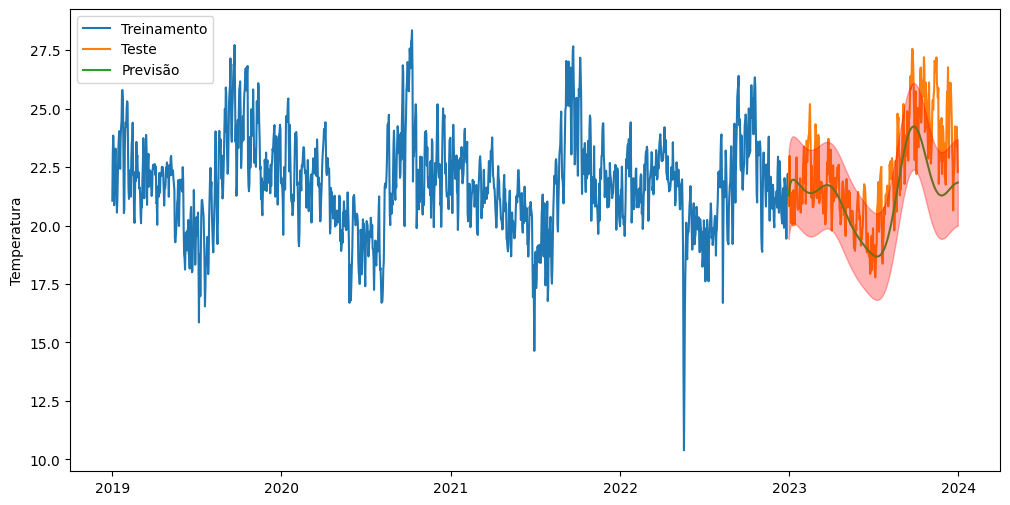

In [47]:
n = len(df_training[forecast_parameter])  # Number of data points
t = np.arange(n)
seasonality = 365  

# Create Fourier terms
def create_fourier_terms(t, period, num_terms):
    terms = []
    for i in range(1, num_terms + 1):
        terms.append(np.sin(2 * np.pi * i * t / period))
        terms.append(np.cos(2 * np.pi * i * t / period))
    return np.column_stack(terms)

num_fourier_terms = 4
fourier_terms = create_fourier_terms(t, seasonality, num_fourier_terms)

# Fit the ARIMA model using arima with Fourier terms as exogenous variables
model = ARIMA(df_training[forecast_parameter],exog=fourier_terms[:n], order=(1,0,0), trend='ct')
model_fit = model.fit()

# Forecast future values with the fitted model
forecast_exog = create_fourier_terms(np.arange(n, n + len(df_test_point_data)), seasonality, num_fourier_terms)

# Get the forecast for the future steps with exogenous variables
forecast_df = pd.DataFrame(forecast_exog, columns=[f'Fourier_{i+1}' for i in range(num_fourier_terms * 2)])

# Fazer previsões
forecast = model_fit.forecast(steps=len(df_test_point_data), exog=forecast_df)

# Visualização das previsões
plt.figure(figsize=(12,6))
plt.plot(df_training.index, df_training[forecast_parameter], label='Treinamento')
plt.plot(df_test_point_data.index, df_test_point_data[forecast_parameter], label='Teste')
plt.plot(df_test_point_data.index, forecast, label='Previsão')
plt.ylabel('Temperatura')
plt.legend(loc='upper left')

# Cálculo erro quadrático
mse = mean_squared_error(df_test_point_data[forecast_parameter], forecast)
rmse = mse**0.5 
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
plt.fill_between(df_test_point_data.index, (forecast-rmse), (forecast+rmse), alpha=.3, color='r', zorder=20)

In [48]:
df_test_point_data

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",RADIACAO GLOBAL (Kj/m²)
Data,,,,,,,,,,,,,,,,,,
2022-12-31,0.187931,896.329310,896.590517,896.053448,1104.844286,20.839655,17.966379,21.381897,20.256034,18.443966,17.447414,87.206897,81.396552,84.379310,141.147826,3.366087,1.266957,877.948571
2023-01-01,0.043103,895.443966,895.736207,895.216379,1104.844286,22.217241,17.562069,22.837069,21.523276,18.170690,17.007759,80.387931,74.198276,76.982759,108.767241,4.936207,1.987069,1603.504286
2023-01-02,0.383193,894.386555,894.736975,894.088235,1104.844286,22.973950,17.147899,23.688235,22.321008,17.763866,16.536975,75.033613,67.470588,71.386555,120.126050,5.435294,2.210924,1738.766197
2023-01-03,0.532773,894.181513,894.468908,893.863025,1104.844286,20.827731,17.630252,21.439496,20.278992,18.111765,17.137815,85.672269,79.663866,83.000000,207.857143,4.082353,1.549580,1142.455714
2023-01-04,0.015652,894.420870,894.710435,894.151304,1104.844286,21.154783,17.806957,21.798261,20.580870,18.321739,17.338261,85.113043,79.252174,82.295652,245.486957,5.132174,2.068696,1363.725714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,0.029091,895.848182,896.123636,895.647273,1104.844286,23.965455,17.841818,24.778182,23.116364,18.712727,16.997273,75.772727,66.709091,71.118182,195.781818,4.479091,1.710000,1698.978571
2023-12-28,0.057895,895.275439,895.525439,895.026316,1104.844286,23.392105,18.395614,24.348246,22.487719,19.099123,17.664912,79.377193,70.008772,74.894737,147.508772,4.453509,1.642105,1317.754286
2023-12-29,0.000000,894.816364,895.100909,894.587273,1104.844286,24.212727,18.722727,25.071818,23.359091,19.356364,18.002727,77.272727,68.918182,73.327273,193.072727,4.437273,1.581818,1336.317143
